In [5]:
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from numpy import loadtxt
from xgboost import XGBClassifier



In [6]:
donnes = "../donnes/Donnes.csv"
names = ['Prix', 'Nombre d\'utilisateur','Excellent', 'Très bon','Moyen','Médiocre','Horrible', 'Nombre des étoiles', 'class']
df = pd.read_csv(donnes, names=names)
df


,Prix,Nombre d'utilisateur,Excellent,Très bon,Moyen,Médiocre,Horrible,Nombre des étoiles,class
0,180,1954,49,42,7,1,0,3,3
1,80,852,69,25,4,1,0,2,2
2,187,2158,29,51,15,4,0,4,3
3,106,1288,36,46,12,3,0,3,2
4,178,873,50,42,6,1,0,3,3
5,104,520,35,51,11,2,0,3,2
6,169,3258,31,50,13,0,0,4,3
7,177,576,80,15,3,1,0,4,3
8,68,190,35,46,15,2,0,0,1
9,123,1452,58,29,7,3,0,4,3


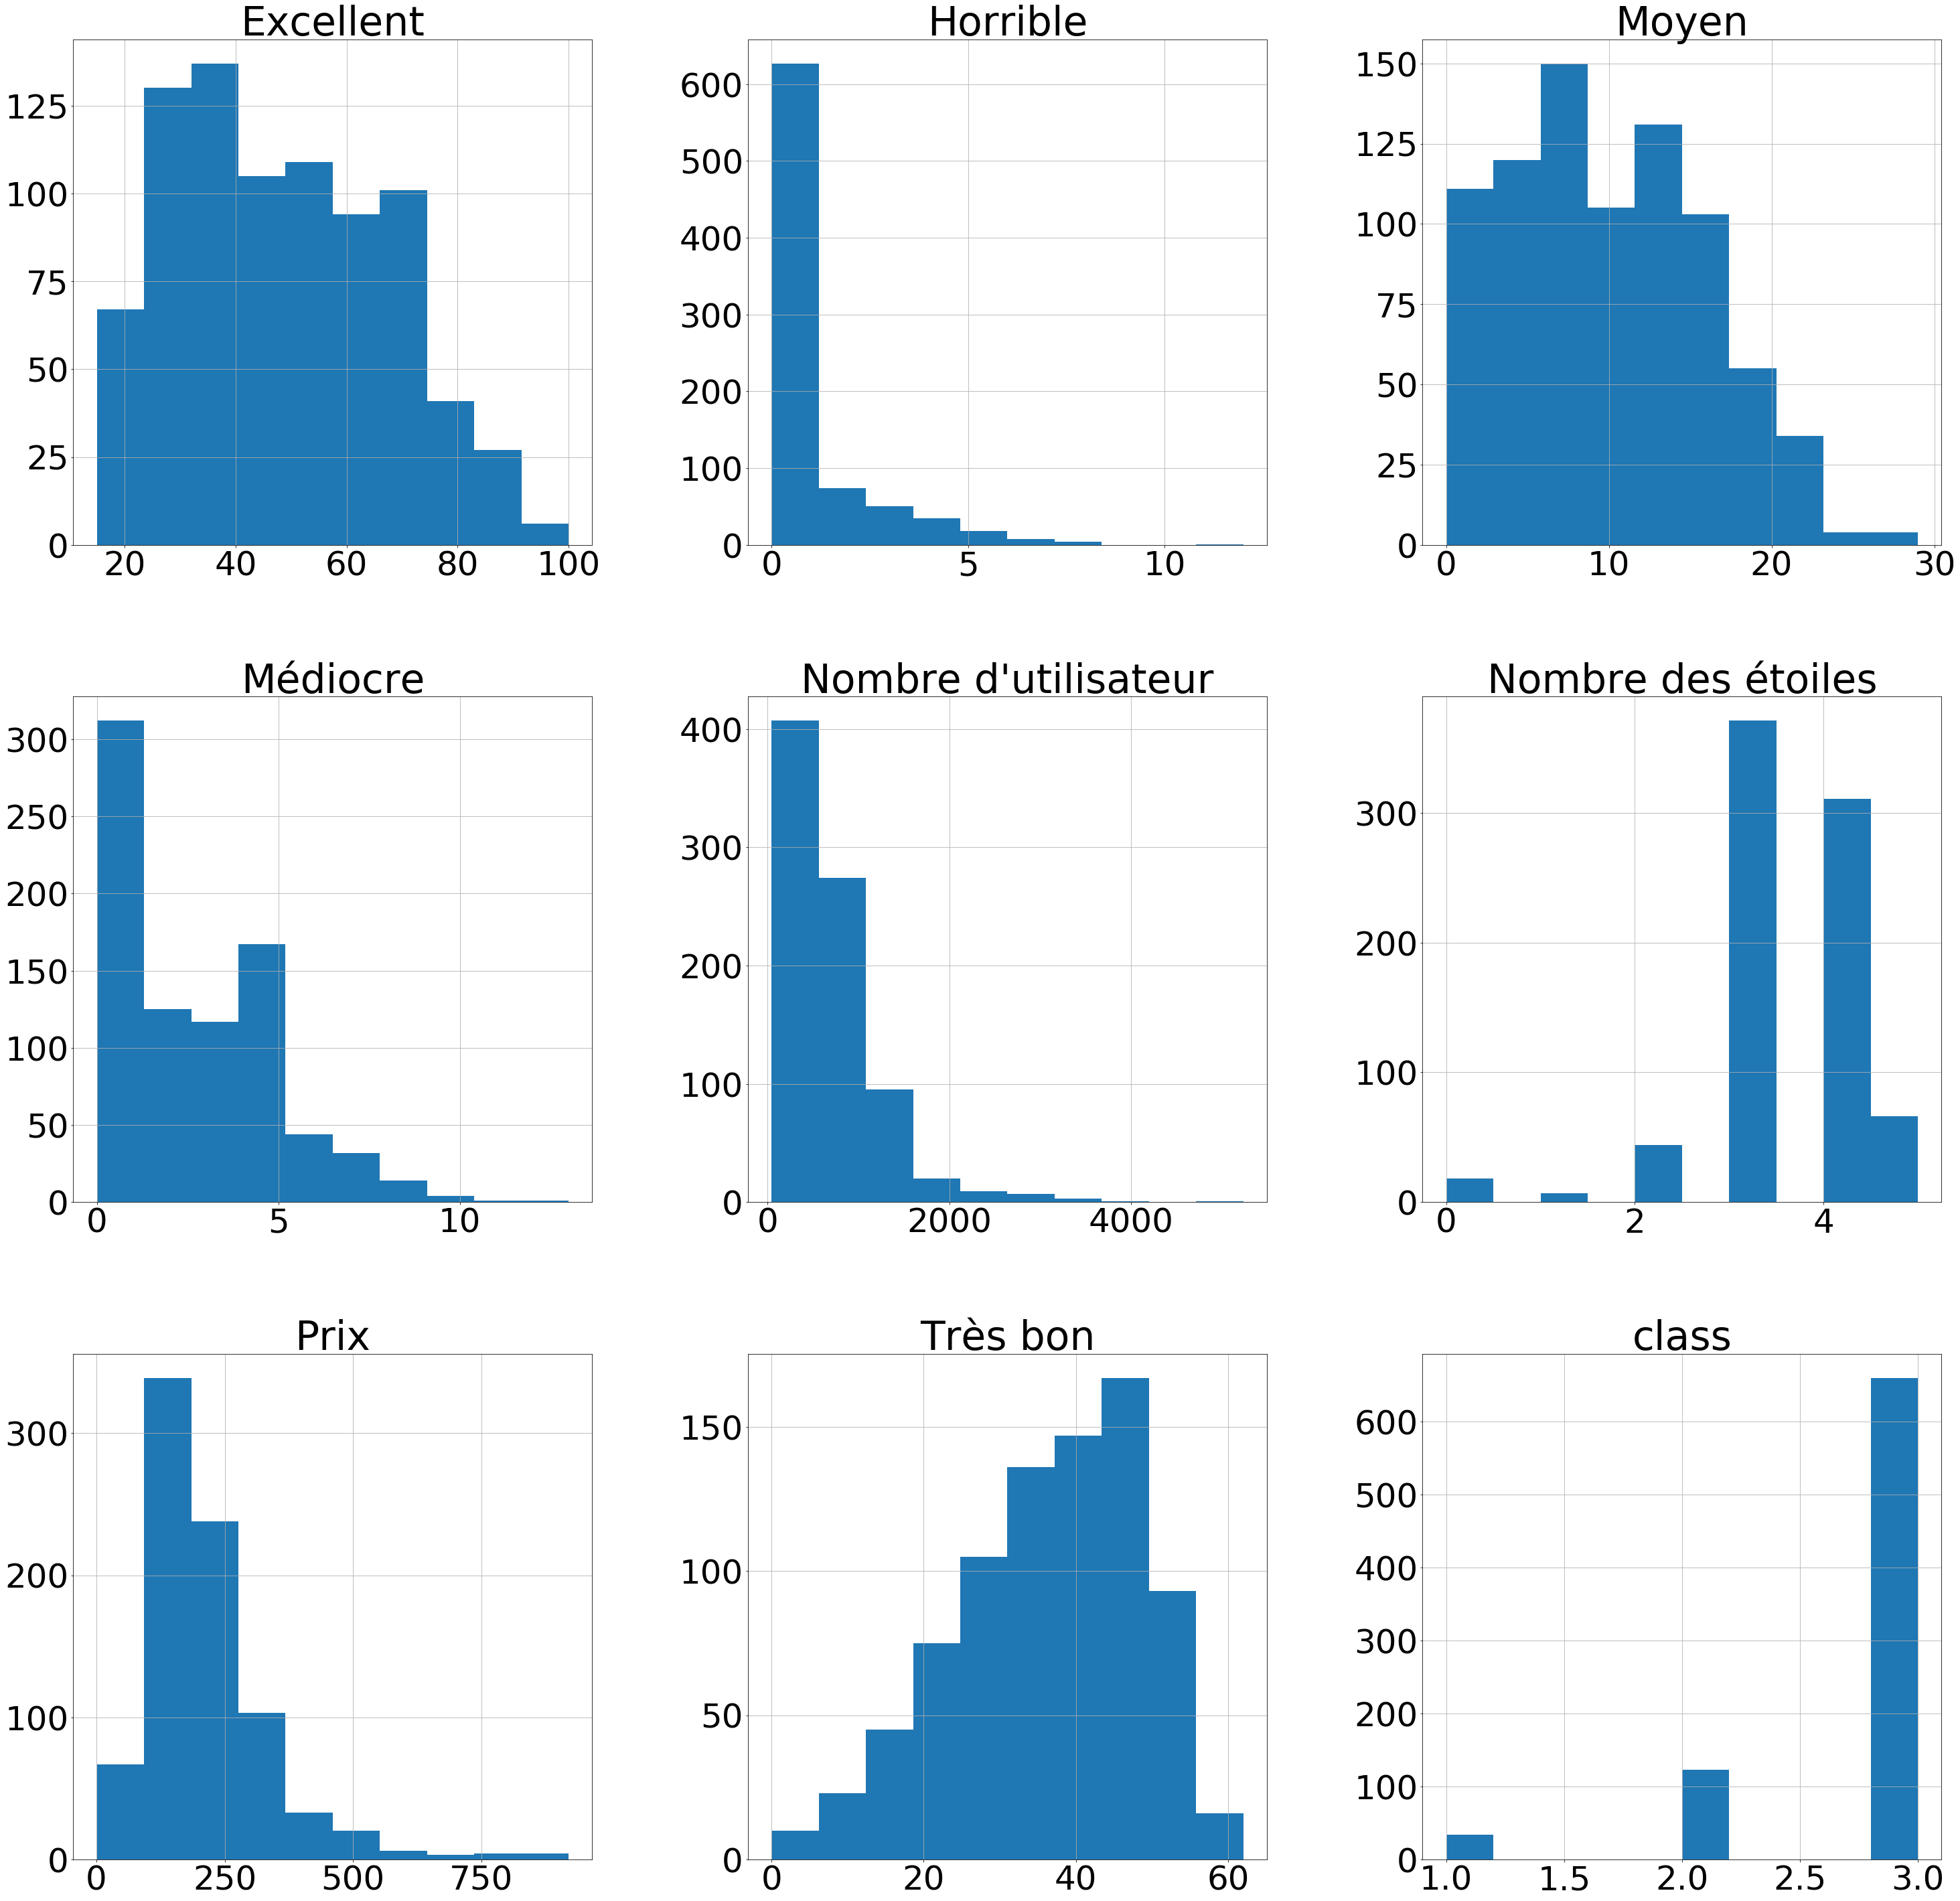

In [7]:
df.hist()
plt.rcParams["figure.figsize"] = (50, 50)
plt.rcParams.update({'font.size': 50})
plt.savefig('histogramme.png')
#plt.show()

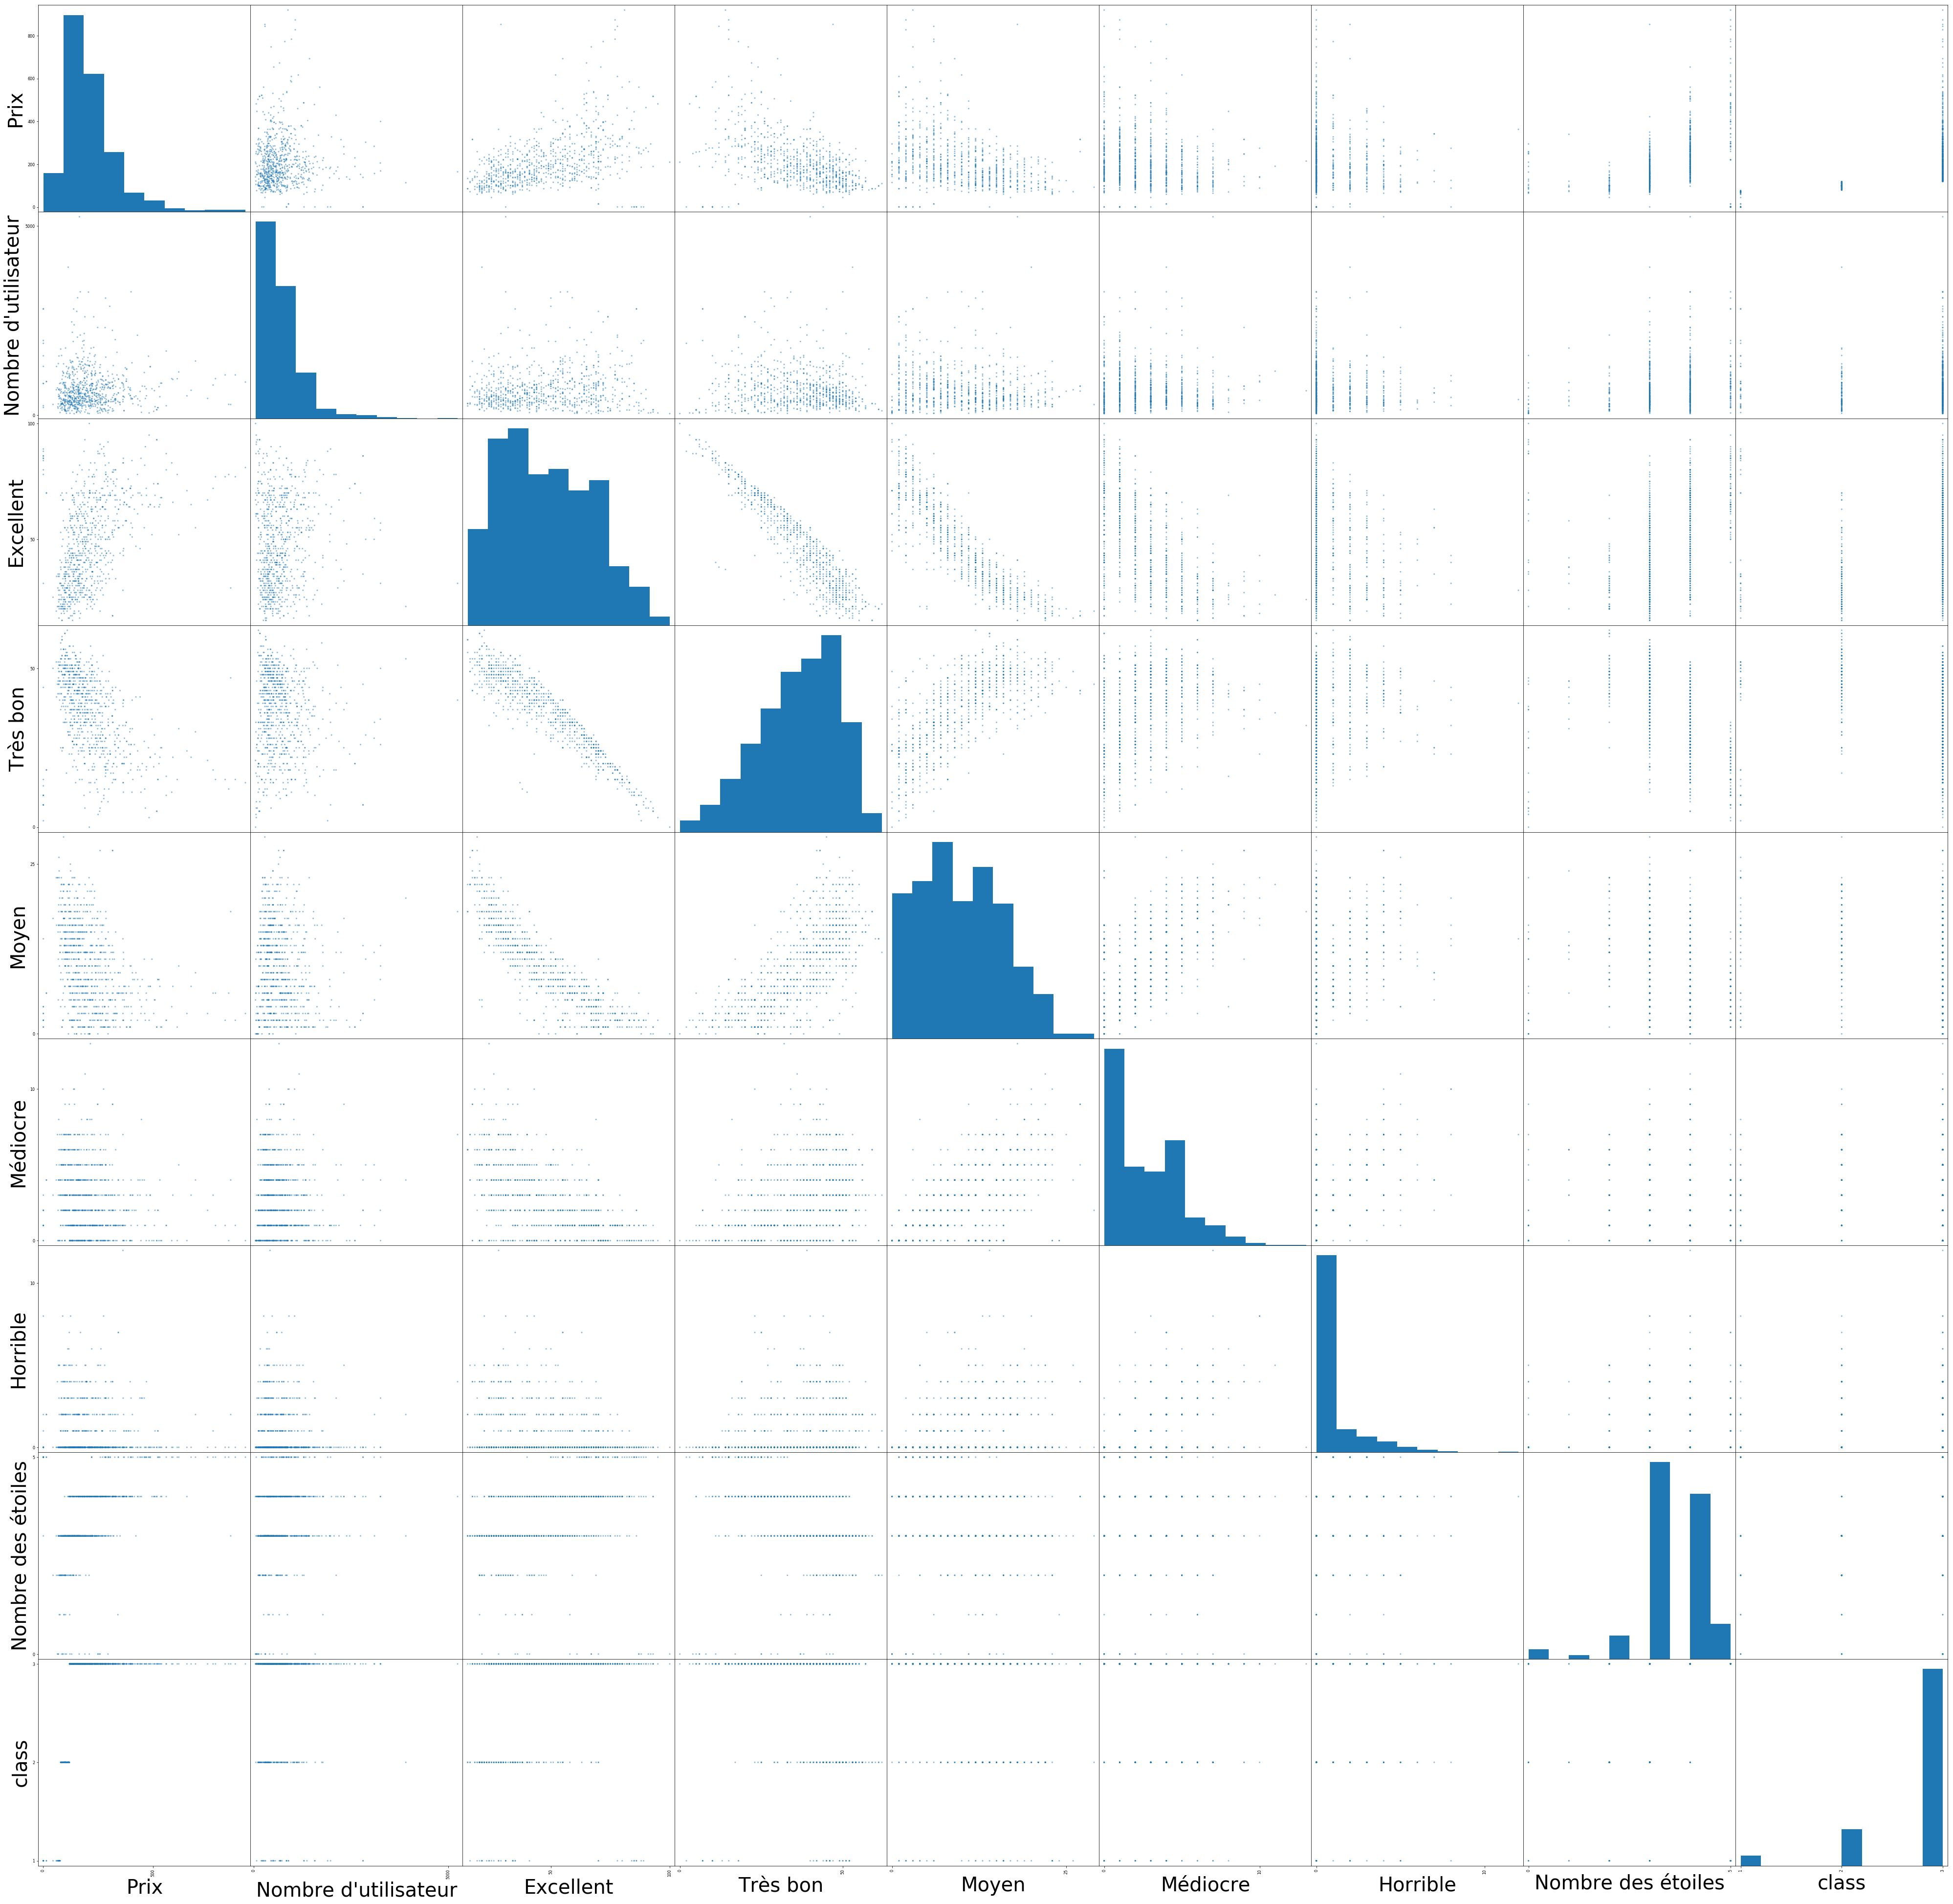

In [12]:
scatter_matrix(df)
plt.rcParams["figure.figsize"] = (70, 70)
plt.rcParams.update({'font.size': 140})
plt.savefig('points_communs.png')
#plt.show()

In [13]:
X = np.array(df.drop(['class', 'Prix'], 1))
y = np.array(df['class'])


In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [15]:
clf = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=5, p=2,
           weights='uniform')
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
clf3 = XGBClassifier()
clf3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
accuracyKNN = clf.score(X_test, y_test)
accuracyRFC = clf2.score(X_test, y_test)
accuracyXGB = clf3.score(X_test, y_test)

print("KNeighborsClassifier : ",accuracyKNN)
print("RandomForestClassifier : ",accuracyRFC)
print("XGBClassifier : ",accuracyXGB)



KNeighborsClassifier :  0.8170731707317073
RandomForestClassifier :  0.8597560975609756
XGBClassifier :  0.8475609756097561


/Users/sabbar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
example_measures = np.array([22,100,10, 199, 2, 0, 1])
example_measures = example_measures.reshape(1,-1)
prediction = clf.predict(example_measures)
print(prediction)


[3]
